<a href="https://colab.research.google.com/github/luck058/kaggle-gold-price-analysis/blob/main/kaggle_gold_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Imports

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


## Load data from github

In [40]:
!git clone https://github.com/luck058/kaggle-gold-price-analysis

%cd kaggle-gold-price-analysis

Cloning into 'kaggle-gold-price-analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 9), reused 10 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 565.94 KiB | 4.04 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis


In [41]:
df = pd.read_csv('financial_regression_cleaned.csv')

In [42]:
display(df.head())
print(df.shape)

,Unnamed: 0,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
3,4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
4,5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,...,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


(3719, 45)


In [43]:
nan_counts = df.isna().sum()
print(nan_counts)

## Missed dates

In [61]:
df['date'] = pd.to_datetime(df['date'])
df['date diff'] = df['date'].diff()
print(df["date diff"].value_counts())


date diff
1 days    2914
3 days     669
4 days     101
2 days      33
5 days       1
Name: count, dtype: int64


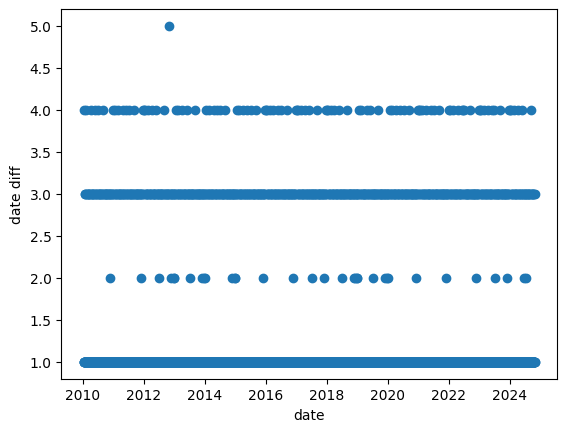

In [96]:
plt.scatter(df["date"][1:], df["date diff"].dt.days[1:])
plt.xlabel("date")
plt.ylabel("date diff")
plt.show()

## Analysis

In [102]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'sp500 open', 'sp500 high', 'sp500 low',
       'sp500 close', 'sp500 volume', 'sp500 high-low', 'nasdaq open',
       'nasdaq high', 'nasdaq low', 'nasdaq close', 'nasdaq volume',
       'nasdaq high-low', 'usd_chf', 'eur_usd', 'silver open', 'silver high',
       'silver low', 'silver close', 'silver volume', 'silver high-low',
       'oil open', 'oil high', 'oil low', 'oil close', 'oil volume',
       'oil high-low', 'platinum open', 'platinum high', 'platinum low',
       'platinum close', 'platinum volume', 'platinum high-low',
       'palladium open', 'palladium high', 'palladium low', 'palladium close',
       'palladium volume', 'palladium high-low', 'gold open', 'gold high',
       'gold low', 'gold close', 'gold volume', 'date diff'],
      dtype='object')


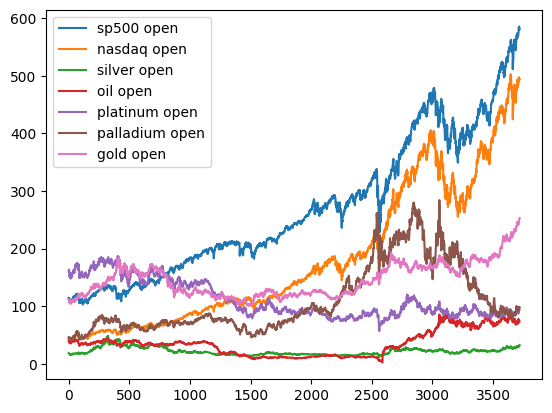

In [117]:
df_open = pd.DataFrame()

for column in df.columns[2:-1]:
    if "volume" in column:
        continue
    if "open" not in column:
        continue

    df_open[column] = df[column]

    plt.plot(df[column], label=column)
plt.legend()
plt.show()


### Correlation

In [127]:
styled_df = df_open.corr().style.background_gradient(cmap='Blues')
display(styled_df)


,sp500 open,nasdaq open,silver open,oil open,platinum open,palladium open,gold open
sp500 open,1.000000,0.991532,-0.062871,0.581236,-0.694140,0.644610,0.681216
nasdaq open,0.991532,1.000000,0.013091,0.624716,-0.637935,0.645362,0.738224
silver open,-0.062871,0.013091,1.000000,0.456053,0.627806,-0.023531,0.600809
oil open,0.581236,0.624716,0.456053,1.000000,0.053159,0.270175,0.753595
platinum open,-0.694140,-0.637935,0.627806,0.053159,1.000000,-0.464430,-0.106921
palladium open,0.644610,0.645362,-0.023531,0.270175,-0.464430,1.000000,0.439741
gold open,0.681216,0.738224,0.600809,0.753595,-0.106921,0.439741,1.000000
